https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner#Part-0-:-Imports,-Settings,-Functions

## Outlines:

- Part 0: Get Data
    - Observe data it types, shape and size.
     
- Part 1: Exploratory Data Analysis
    - Observe data with Stats and visulizations
    - List of Numerical and Categorical Variables.
    - Missing values
    - Correlated variables
    - Relationship of all the features with the traget attribute
    
- Part 2: Data Wrangling
    - Dropping all columns with weak correlation to target feature.
    - One Hot Encoding
    - Scaling Dataset
    
- Part 3: Scikit-learn basic regression models and comparison of results
    - Implement GridSearchCV with RMSE metric for Hyperparameter tuning for these models from sklearn:
        - Linear Regression
        - Ridge
        - Lasso
        - ELastic Net
        - Stochastic Gradient Descent
        - Random Forest Regressor
        - KNN Regressor
           
    - based on RMSE metric, compare performance of the regressors with their optimized parameters, 
    - then explore correlation of the predictions and make submission with mean fo the best models
    - Comparison plot: RMSE of all models
    - Correlation of model results
    - Mean of best models


# 0. Get Data

- Observe data it types, shape and size.

In [574]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',105)

In [575]:
# Load Dataset

path = "E:/Learning/MachineLearning/Advanced_House_Price_Prediction/Datasets/"
df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

<b> Observe datas

In [576]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [577]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


So, there are exactly 81 features which is alot. We have to keep the datas which is only relevant to our model.

In [578]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

This is a lot to count, so we will sepearate these dataset into <b> categorical </b> and <b> numerical </b>.

In [579]:
categorical_df = df_train.select_dtypes(include = 'object')
numerical_df = df_train.select_dtypes(exclude = 'object')

In [580]:
categorical_df.shape

(1460, 43)

In [581]:
numerical_df.shape

(1460, 38)

So, we now know there are exactly <b> 43 Categorical types </b> and <b> 38 Numerical types </b>

# Part 1: Exploratory Data Analysis


- Observing Target Values
- Correlation and Importance of feature
- Missing Values
- Outliers
- Observatioin with Visualization.
    - Univariate analysis
    - Bivariate analysis


In [582]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Observing Target Attribute

In [583]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


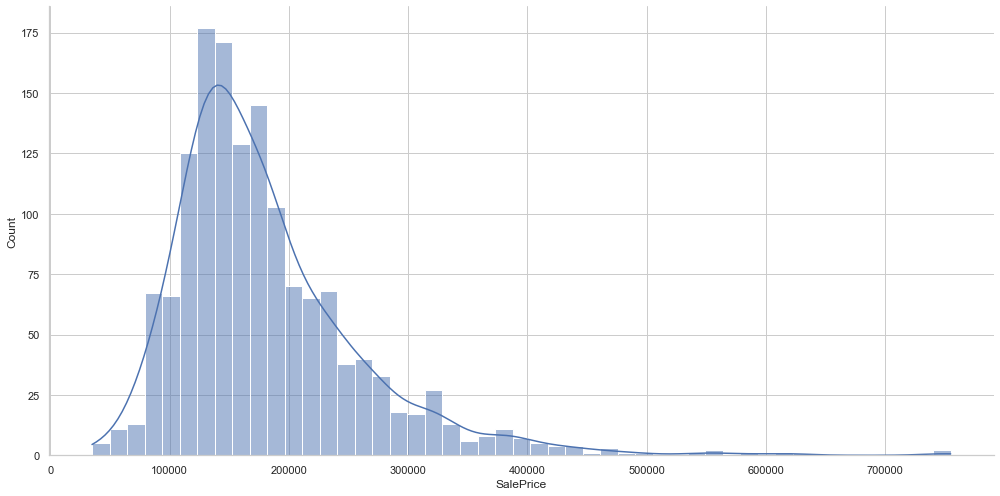

In [584]:
# Checking the target attribute

sns.displot(x = 'SalePrice', height = 7, aspect = 2, data = df_train, kde = True);

In [585]:
# Kurtosis and Skewness

from scipy.stats import kurtosis, skew

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


After Log, Skewness: 0.121335
After Log, Kurtosis: 0.809532


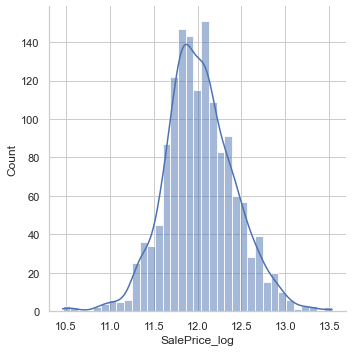

In [586]:
# Let's fix the distribution of the target attribute

df_train['SalePrice_log'] = np.log(df_train['SalePrice'])

sns.displot(df_train['SalePrice_log'], kde = True);

# skewness and kurtosis
print("After Log, Skewness: %f" % (df_train['SalePrice_log'].skew()))
print("After Log, Kurtosis: %f" % df_train['SalePrice_log'].kurt())

### Correlation 

Since there are a lot of features to dig in, so we will only select high correlated features.

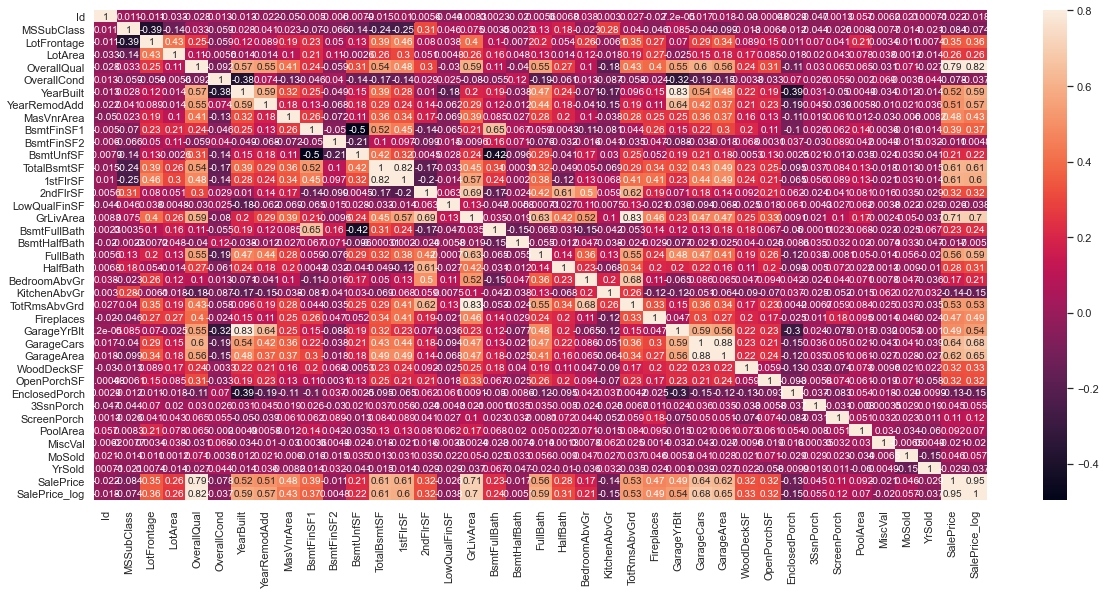

In [587]:
# corelation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (20,9))
sns.heatmap(corrmat, vmax = .8, annot = True);

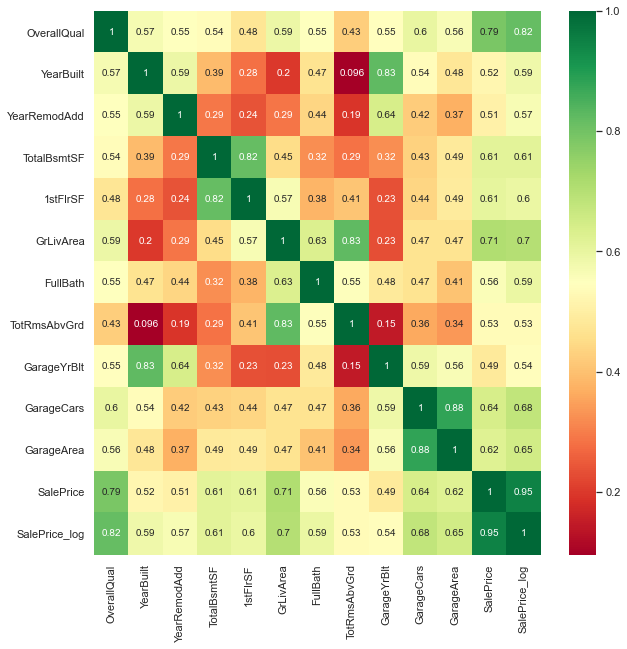

In [588]:
# most correlated features

corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice_log']) > 0.5]
plt.figure(figsize = (10,10))
g = sns.heatmap(df_train[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [589]:
## Before making huge change on dataset let's us copy the original dataframe

xdf = df_train[top_corr_features].copy()

In [590]:
xdf['Id'] = df_train['Id']

In [591]:
xdf

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,SalePrice_log,Id
0,7,2003,2003,856,856,1710,2,8,2003.0,2,548,208500,12.247694,1
1,6,1976,1976,1262,1262,1262,2,6,1976.0,2,460,181500,12.109011,2
2,7,2001,2002,920,920,1786,2,6,2001.0,2,608,223500,12.317167,3
3,7,1915,1970,756,961,1717,1,7,1998.0,3,642,140000,11.849398,4
4,8,2000,2000,1145,1145,2198,2,9,2000.0,3,836,250000,12.429216,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,1999.0,2,460,175000,12.072541,1456
1456,6,1978,1988,1542,2073,2073,2,7,1978.0,2,500,210000,12.254863,1457
1457,7,1941,2006,1152,1188,2340,2,9,1941.0,1,252,266500,12.493130,1458
1458,5,1950,1996,1078,1078,1078,1,5,1950.0,1,240,142125,11.864462,1459


### Observing Missing Values

In [592]:
total = xdf.isnull().sum().sort_values(ascending = False)
percent = (xdf.isnull().sum() / xdf.isnull().count()).sort_values(ascending = False)
types = xdf[percent.index].dtypes

missing_data = pd.concat([total, percent, types], axis = 1, keys = ['Total','Percent','Types'])
missing_data.head(2)

,Total,Percent,Types
GarageYrBlt,81,0.055479,float64
Id,0,0.000000,int64


1 attribute has missing values. Let's fix it

### Filling missing values 



In [593]:
xdf['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [594]:
## Replace with 'Mean' in this attribute


xdf['GarageYrBlt'].fillna(xdf['GarageYrBlt'].mean(), inplace = True)

In [595]:
# Again confirming the we replace missing values

total = xdf.isnull().sum().sort_values(ascending = False)
percent = (xdf.isnull().sum() / xdf.isnull().count()).sort_values(ascending = False)
types = xdf[percent.index].dtypes

missing_data = pd.concat([total, percent, types], axis = 1, keys = ['Total','Percent','Types'])
missing_data.head(5)

,Total,Percent,Types
Id,0,0.0,int64
SalePrice_log,0,0.0,float64
SalePrice,0,0.0,int64
GarageArea,0,0.0,int64
GarageCars,0,0.0,int64


### Outliers

We have so less data for training. As imputing Outliers will lead us to loss of extra datas. We will remove outliers with log transformation.

In [596]:
print(xdf.shape, xdf.shape)

(1460, 14) (1460, 14)


In [597]:
# Let's plot a disribution plot of numerical columns but first

xdf.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,SalePrice_log,Id
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1978.506164,1.767123,472.980137,180921.195890,12.024051,730.500000
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,23.994583,0.747315,213.804841,79442.502883,0.399452,421.610009
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,34900.000000,10.460242,1.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1962.000000,1.000000,334.500000,129975.000000,11.775097,365.750000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,1978.506164,2.000000,480.000000,163000.000000,12.001505,730.500000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2001.000000,2.000000,576.000000,214000.000000,12.273731,1095.250000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,2010.000000,4.000000,1418.000000,755000.000000,13.534473,1460.000000


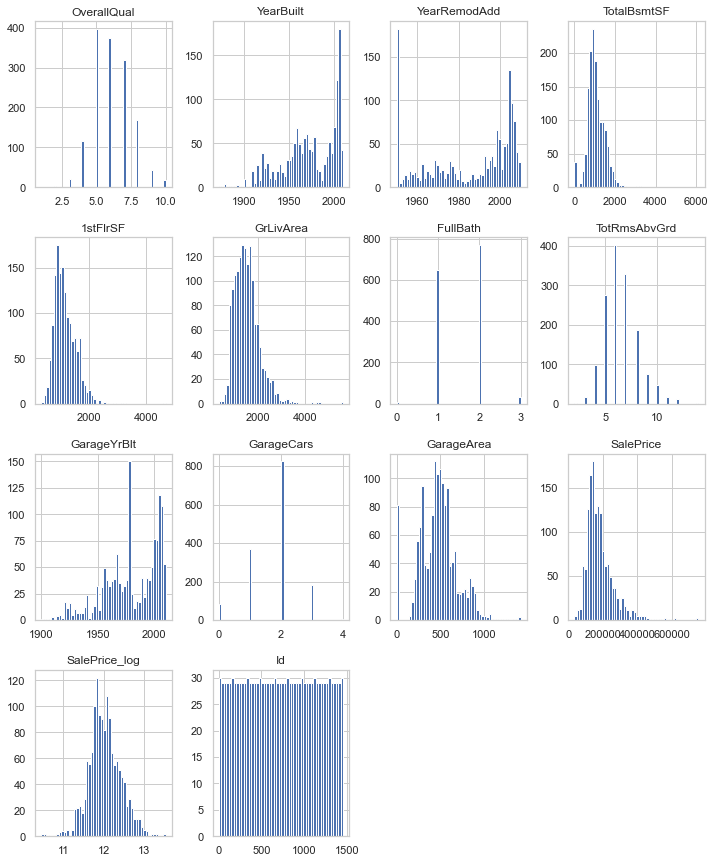

In [598]:
# Visualize the outliers

xdf.hist(bins = 50, figsize = (12,15));

We will be normalizing on the important features.

Skewness: 1.524255
Kurtosis: 13.250483


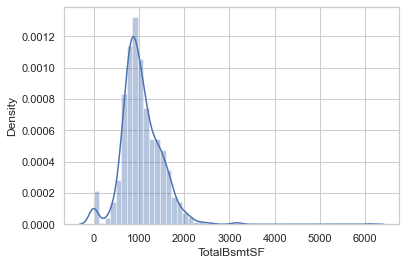

In [599]:
# TotalBsmtSF

sns.distplot(xdf['TotalBsmtSF']);
#skewness and kurtosis
print("Skewness: %f" % xdf['TotalBsmtSF'].skew())
print("Kurtosis: %f" % xdf['TotalBsmtSF'].kurt())

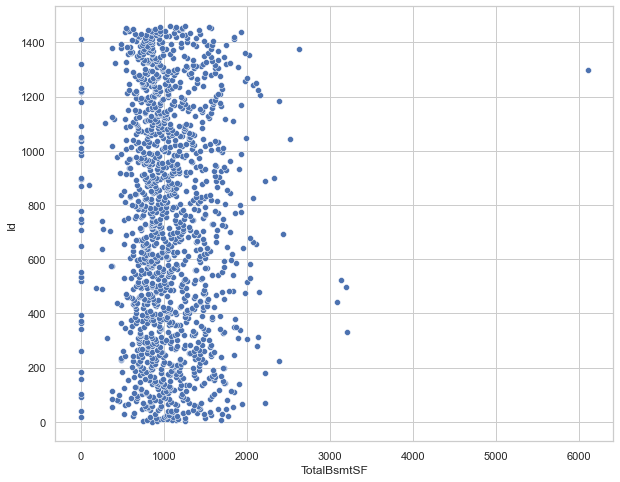

In [600]:
## scatterplot

plt.figure(figsize = (10,8))
sns.scatterplot(x = 'TotalBsmtSF', y = 'Id', data = xdf);

We see "Total Square feet of basement area" is 0. Let's replace it with mean values.

In [601]:
xdf['TotalBsmtSF'].replace(0, xdf['TotalBsmtSF'].median(), inplace = True)

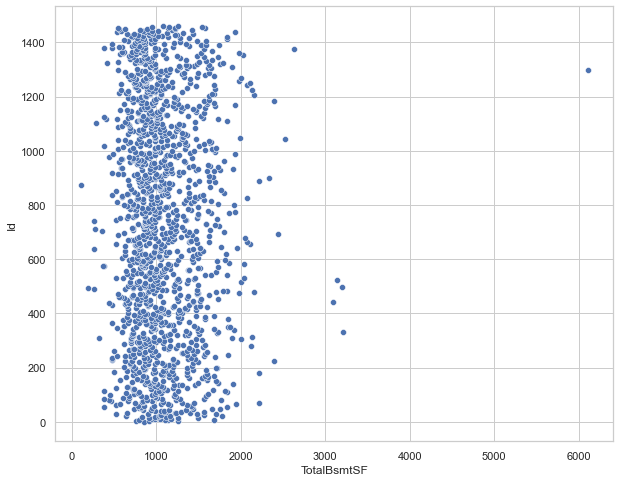

In [602]:
## scatterplot

plt.figure(figsize = (10,8))
sns.scatterplot(x = 'TotalBsmtSF', y = 'Id', data = xdf);

After Log, Skewness: -0.273818
After Log, Kurtosis: 2.059515


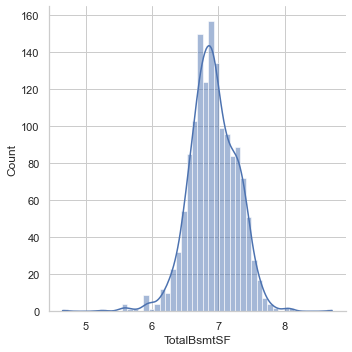

In [603]:
# Let's fix the distribution of the target attribute

xdf['TotalBsmtSF'] = np.log(xdf['TotalBsmtSF'])

sns.displot(xdf['TotalBsmtSF'], kde = True);

# skewness and kurtosis
print("After Log, Skewness: %f" % (xdf['TotalBsmtSF'].skew()))
print("After Log, Kurtosis: %f" % xdf['TotalBsmtSF'].kurt())

Skewness: 1.376757
Kurtosis: 5.745841


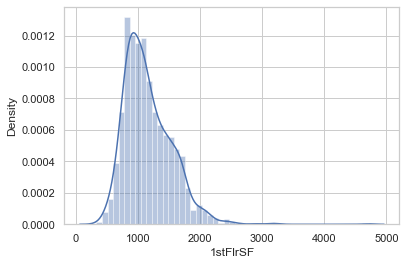

In [604]:
# 1stFlrSF

sns.distplot(xdf['1stFlrSF']);

#skewness and kurtosis
print("Skewness: %f" % xdf['1stFlrSF'].skew())
print("Kurtosis: %f" % xdf['1stFlrSF'].kurt())

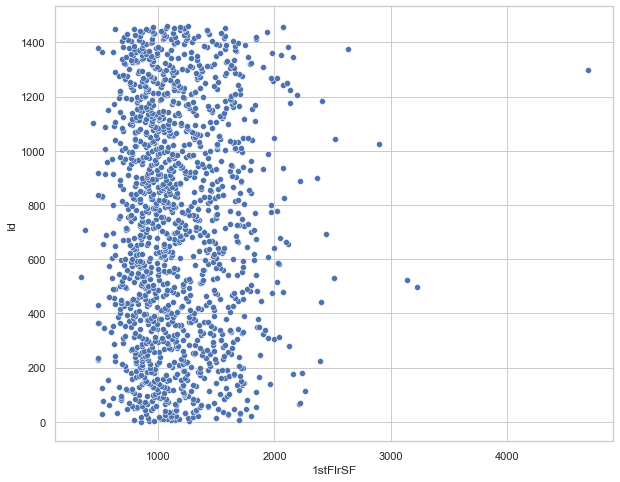

In [605]:
## scatterplot

plt.figure(figsize = (10,8))
sns.scatterplot(x = '1stFlrSF', y = 'Id', data = xdf);

After Log, Skewness: 0.079157
After Log, Kurtosis: 0.150808


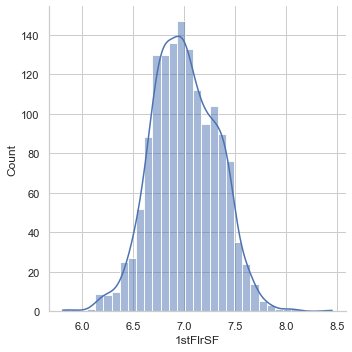

In [606]:
## Appplying logarithmic

xdf['1stFlrSF'] = np.log(xdf['1stFlrSF'])

sns.displot(xdf['1stFlrSF'], kde = True);

# skewness and kurtosis
print("After Log, Skewness: %f" % (xdf['1stFlrSF'].skew()))
print("After Log, Kurtosis: %f" % xdf['1stFlrSF'].kurt())

Skewness: 1.366560
Kurtosis: 4.895121


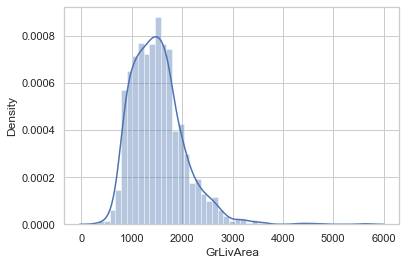

In [607]:
## GrLivArea


sns.distplot(xdf['GrLivArea']);

#skewness and kurtosis
print("Skewness: %f" % xdf['GrLivArea'].skew())
print("Kurtosis: %f" % xdf['GrLivArea'].kurt())

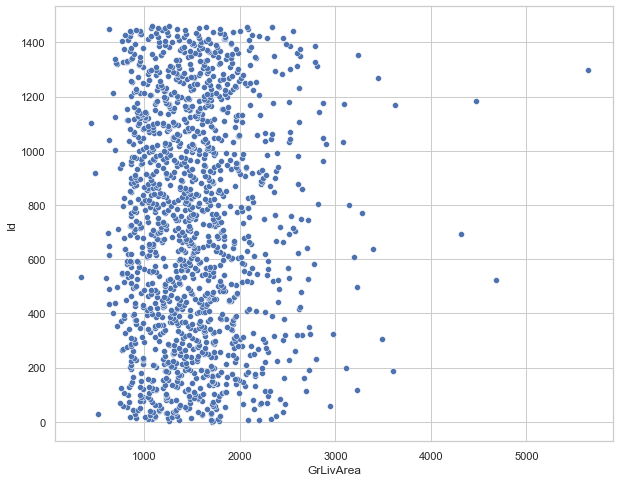

In [608]:
## scatterplot

plt.figure(figsize = (10,8))
sns.scatterplot(x = 'GrLivArea', y = 'Id', data = xdf);

After Log, Skewness: -0.006995
After Log, Kurtosis: 0.282603


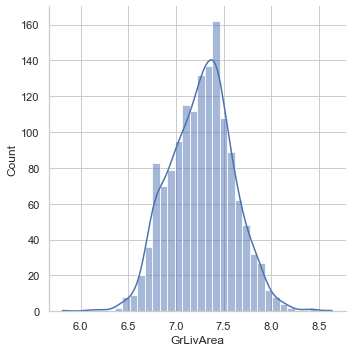

In [609]:
# Applying Log

xdf['GrLivArea'] = np.log(xdf['GrLivArea'])

sns.displot(xdf['GrLivArea'], kde = True);

# skewness and kurtosis
print("After Log, Skewness: %f" % (xdf['GrLivArea'].skew()))
print("After Log, Kurtosis: %f" % xdf['GrLivArea'].kurt())

Skewness: 0.179981
Kurtosis: 0.917067


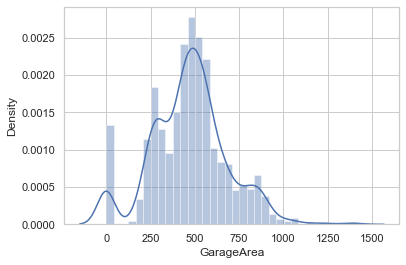

In [610]:
## GarageArea

sns.distplot(xdf['GarageArea']);

#skewness and kurtosis
print("Skewness: %f" % xdf['GarageArea'].skew())
print("Kurtosis: %f" % xdf['GarageArea'].kurt())

In [611]:
## Replacing the 0's with median

xdf['GarageArea'].replace(0, xdf['GarageArea'].median(), inplace = True)

After Log, Skewness: -0.165452
After Log, Kurtosis: 0.352606


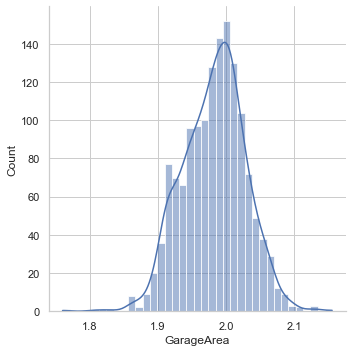

In [612]:
xdf['GarageArea'] = np.log(xdf['GrLivArea'])

sns.displot(xdf['GarageArea'], kde = True);

# skewness and kurtosis
print("After Log, Skewness: %f" % (xdf['GarageArea'].skew()))
print("After Log, Kurtosis: %f" % xdf['GarageArea'].kurt())

In [613]:
xdf.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,SalePrice_log,Id
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,6.924377,7.007501,7.267774,1.565068,6.517808,1978.506164,1.767123,1.982394,180921.195890,12.024051,730.500000
std,1.382997,30.202904,20.645407,0.356753,0.317730,0.333550,0.550916,1.625393,23.994583,0.747315,0.046036,79442.502883,0.399452,421.610009
min,1.000000,1872.000000,1950.000000,4.653960,5.811141,5.811141,0.000000,2.000000,1900.000000,0.000000,1.759777,34900.000000,10.460242,1.000000
25%,5.000000,1954.000000,1967.000000,6.704414,6.782192,7.029530,1.000000,5.000000,1962.000000,1.000000,1.950120,129975.000000,11.775097,365.750000
50%,6.000000,1973.000000,1994.000000,6.899471,6.991176,7.288928,2.000000,6.000000,1978.506164,2.000000,1.986356,163000.000000,12.001505,730.500000
75%,7.000000,2000.000000,2004.000000,7.168772,7.237958,7.482541,2.000000,7.000000,2001.000000,2.000000,2.012572,214000.000000,12.273731,1095.250000
max,10.000000,2010.000000,2010.000000,8.717682,8.453614,8.637994,3.000000,14.000000,2010.000000,4.000000,2.156170,755000.000000,13.534473,1460.000000


In [614]:
xdf.drop(['SalePrice','Id'],axis =1, inplace = True)

In [615]:
from sklearn.model_selection import train_test_split

In [617]:
X = xdf.drop(['SalePrice_log'], axis = 1)
y = xdf['SalePrice_log']

In [618]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [623]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
254,5,1957,1957,7.180831,7.180831,7.180831,1,5,1957.000000,1,1.971415
1066,6,1993,1994,6.683361,6.683361,7.359468,2,7,1993.000000,2,1.995988
638,5,1910,1950,6.679599,6.679599,6.679599,1,4,1978.506164,0,1.899058
799,5,1937,1950,6.594413,6.888572,7.477604,1,7,1939.000000,1,2.011912
380,5,1924,1950,6.933423,6.933423,7.433075,2,6,1924.000000,1,2.005940
...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2006,2006,7.180831,7.180831,7.180831,2,6,2006.000000,2,1.971415
1130,4,1928,1950,7.022868,7.191429,7.591357,2,7,1981.000000,2,2.027010
1294,5,1955,1990,6.761573,6.761573,6.761573,1,5,1957.000000,2,1.911256
860,7,1918,1998,6.815640,6.815640,7.262629,1,7,1925.000000,1,1.982742


In [619]:
## Scaling the dataset

In [620]:
from sklearn.preprocessing import StandardScaler

In [621]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [622]:
X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

## Modeling and Testing

We test the following Regressors from scikit-learn:
- LinearRegression
- Ridge
- Lasso
- Elastic Net
- Stochastic Gradient Descent
- DecisionTreeRegressor
- RandomForestRegressor
- SVR

In [ ]:
## Creating RMSE metrics

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1


In [ ]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [ ]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [ ]:

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear.fit(X, y)

sc_linear = get_best_score(grid_linear)


In [ ]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear_sc = GridSearchCV(linreg_sc, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear_sc.fit(X_train_std, y_train)

sc_linear_sc = get_best_score(grid_linear_sc)

In [ ]:
lr.score(X_test, y_test)